# Simple code to recognise Pan Card number & DOB

Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
#Tesseract Library
import pytesseract

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

### Make prettier the prints ###
from colorama import Fore, Style
c_ = Fore.CYAN
m_ = Fore.MAGENTA
r_ = Fore.RED
b_ = Fore.BLUE
y_ = Fore.YELLOW
g_ = Fore.GREEN
w_ = Fore.WHITE

import warnings
warnings.filterwarnings(action='ignore') 

Base Function

In [2]:
def ExtractDetails(image_path):
    text = pytesseract.image_to_string(Image.open(image_path), lang = 'eng')
    text = text.replace("\n", " ")
    text = text.replace("  ", " ")
    regex_DOB = re.compile('\d{2}[-/]\d{2}[-/]\d{4}')
    regex_num = re.compile('[A-Z]{5}[0-9]{4}[A-Z]{1}')
    
    image = cv2.imread(os.path.join(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")  
    
    if len(regex_num.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing pan card number !!!')
        print(Style.RESET_ALL)
    else:
        print("Pan Card Number : ", regex_num.findall(text)[0])
        
    print('=================================')
    
    if len(regex_DOB.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!')
        print(Style.RESET_ALL)
    else:
        print("DATE OF BIRTH :   ", regex_DOB.findall(text)[0])
        
    print('=================================')

### Testing on random images from the Internet

Pan Card Number :  ELWPM8089J
DATE OF BIRTH :    30/01/1997


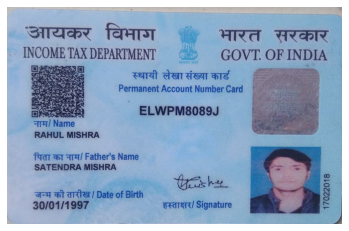

In [3]:
ExtractDetails('../input/pan-card/pan1.png')

Pan Card Number :  BXAPC1000L
DATE OF BIRTH :    13/09/1996


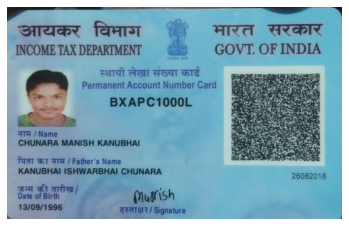

In [4]:
ExtractDetails('../input/pan-card/pan2.png')

Pan Card Number :  BGYPJ0129A
Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!



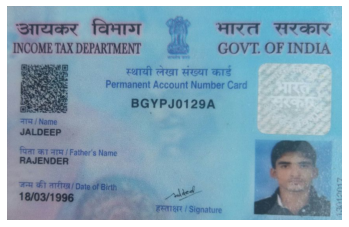

In [5]:
ExtractDetails('../input/pan-card/pan3.png')

Pan Card Number :  BNZPM2501F
DATE OF BIRTH :    16/07/1986


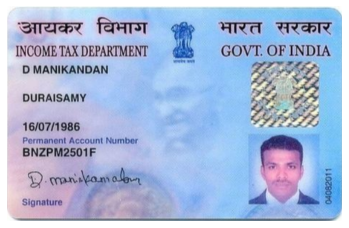

In [6]:
ExtractDetails('../input/pan-card/pan_from_internet2.png')